In [1]:
# CLUSTERING ANALYSIS 

In [ ]:
# Understanding and Implementing K-Means and DBSCAN Algorithms

In [ ]:
# Datasets :
# Data Preprocessing:
# 1.Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
# 2.Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
# 3.Use multiple visualizations to understand the hidden patterns in the dataset

In [81]:
# Data Preprocessing:
# 1.Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
import pandas as pd
df= pd.read_excel("EastWestAirlines.xlsx",sheet_name=1)
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [83]:
 df.isnull().sum()# There are no null values in the given data set.

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

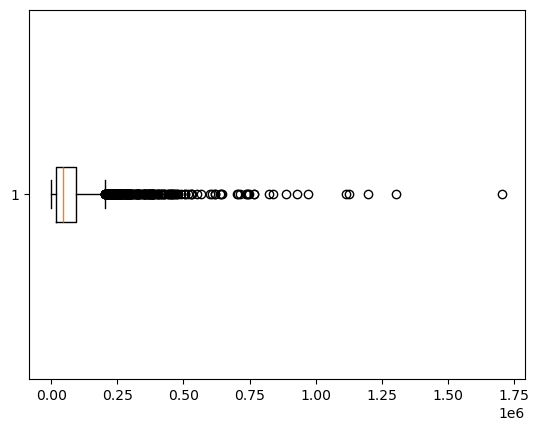

In [84]:
import matplotlib.pyplot as plt
plt.boxplot(df['Balance'],vert=False)
plt.show()

In [85]:
import numpy as np
import pandas as pd
q1= np.percentile(df['Balance'],25)
q2= np.percentile(df['Balance'],50)
q3= np.percentile(df['Balance'],75)
iqr=q3-q1
uw= q3+(iqr*1.5)
lw= q1-(iqr*1.5)
print(len(df[df['Balance']>uw]))
print(len(df[df['Balance']<lw]))
df.loc[df['Balance']>uw,'Balance']=uw
df.loc[df['Balance']<lw,'Balance']=lw

266
0


C:\Users\andeb\AppData\Local\Temp\ipykernel_8992\1269249767.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '203218.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Balance']>uw,'Balance']=uw


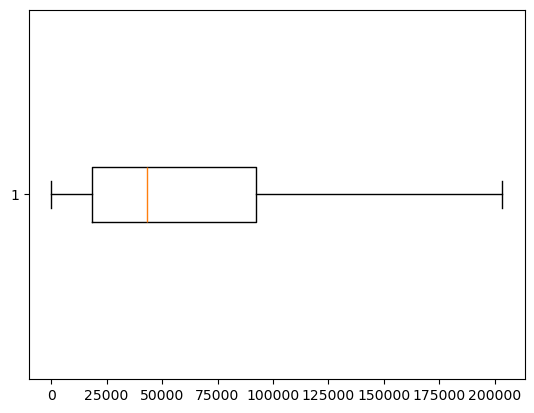

In [86]:
import matplotlib.pyplot as plt
plt.boxplot(df['Balance'],vert=False)
plt.show()

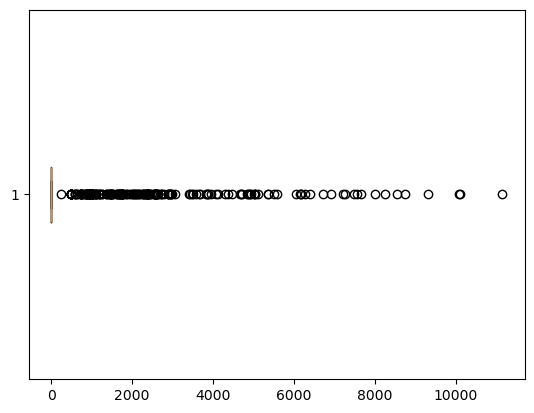

In [87]:
import matplotlib.pyplot as plt
plt.boxplot(df['Qual_miles'],vert=False)
plt.show()

In [88]:
import numpy as np
import pandas as pd
q1= np.percentile(df['Qual_miles'],25)
q2= np.percentile(df['Qual_miles'],50)
q3= np.percentile(df['Qual_miles'],75)
iqr=q3-q1
uw= q3+(iqr*1.5)
lw= q1-(iqr*1.5)
print(len(df[df['Qual_miles']>uw]))
df.loc[df['Qual_miles']>uw,'Qual_miles']=uw

226


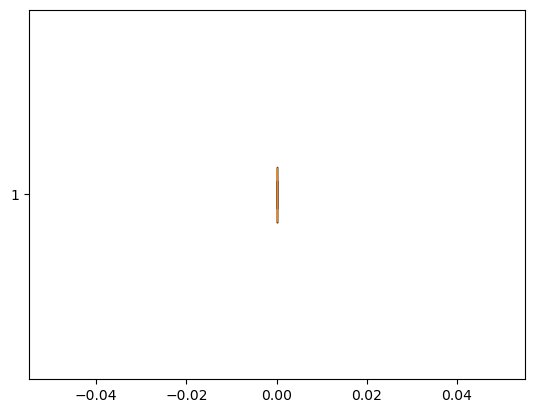

In [89]:
import matplotlib.pyplot as plt
plt.boxplot(df['Qual_miles'],vert=False)
plt.show()

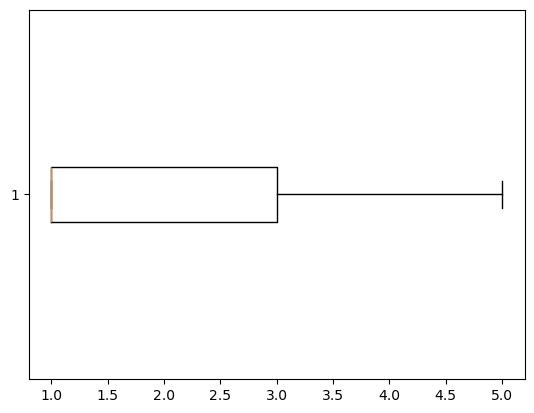

In [90]:
import matplotlib.pyplot as plt
plt.boxplot(df['cc1_miles'],vert=False)
plt.show()

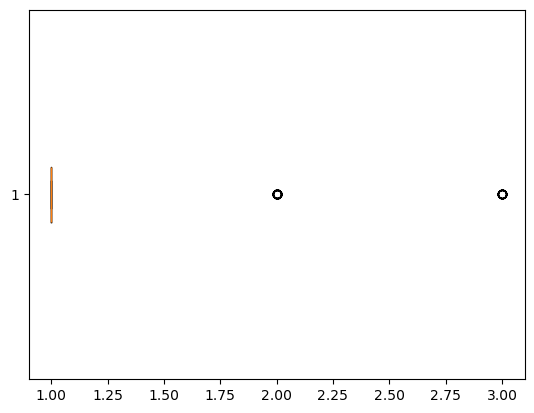

In [91]:
import matplotlib.pyplot as plt
plt.boxplot(df['cc2_miles'],vert=False)
plt.show()

In [92]:
import numpy as np
import pandas as pd
q1= np.percentile(df['cc2_miles'],25)
q2= np.percentile(df['cc2_miles'],50)
q3= np.percentile(df['cc2_miles'],75)
iqr=q3-q1
uw= q3+(iqr*1.5)
lw= q1-(iqr*1.5)
print(len(df[df['cc2_miles']>uw]))
df.loc[df['cc2_miles']>uw,'cc2_miles']=uw

43


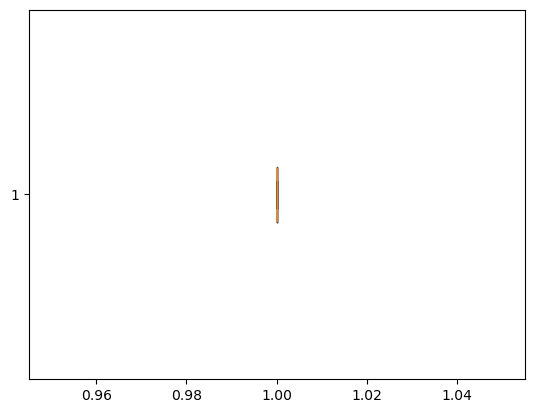

In [93]:
import matplotlib.pyplot as plt
plt.boxplot(df['cc2_miles'],vert=False)
plt.show()

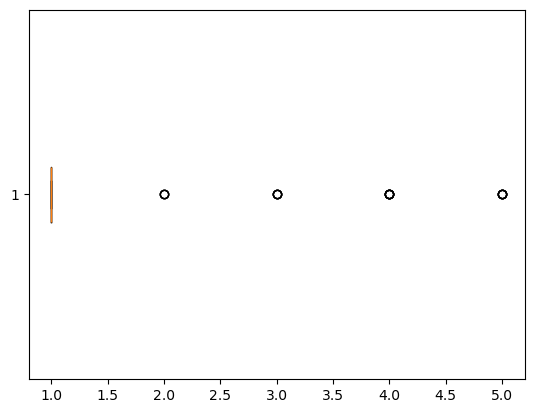

In [94]:
import matplotlib.pyplot as plt
plt.boxplot(df['cc3_miles'],vert=False)
plt.show()

In [95]:
import numpy as np
import pandas as pd
q1= np.percentile(df['cc3_miles'],25)
q2= np.percentile(df['cc3_miles'],50)
q3= np.percentile(df['cc3_miles'],75)
iqr=q3-q1
uw= q3+(iqr*1.5)
lw= q1-(iqr*1.5)
print(len(df[df['cc3_miles']>uw]))
df.loc[df['cc3_miles']>uw,'cc3_miles']=uw

18


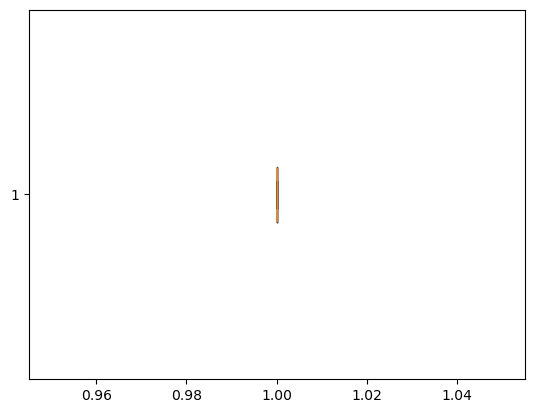

In [96]:
import matplotlib.pyplot as plt
plt.boxplot(df['cc3_miles'],vert=False)
plt.show()

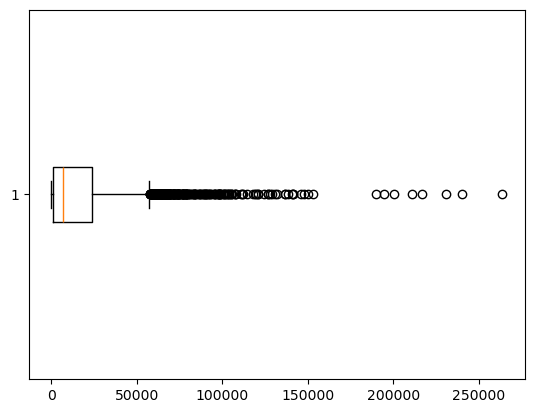

In [97]:
import matplotlib.pyplot as plt
plt.boxplot(df['Bonus_miles'],vert=False)
plt.show()

In [98]:
import numpy as np
import pandas as pd
q1= np.percentile(df['Bonus_miles'],25)
q2= np.percentile(df['Bonus_miles'],50)
q3= np.percentile(df['Bonus_miles'],75)
iqr=q3-q1
uw= q3+(iqr*1.5)
lw= q1-(iqr*1.5)
print(len(df[df['Bonus_miles']>uw]))
df.loc[df['Bonus_miles']>uw,'Bonus_miles']=uw

280


C:\Users\andeb\AppData\Local\Temp\ipykernel_8992\147016954.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '57626.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Bonus_miles']>uw,'Bonus_miles']=uw


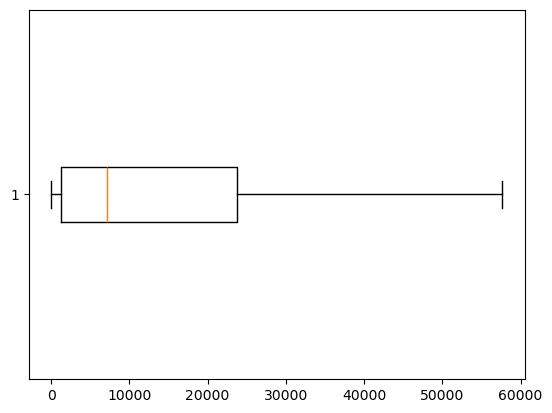

In [99]:
import matplotlib.pyplot as plt
plt.boxplot(df['Bonus_miles'],vert=False)
plt.show()

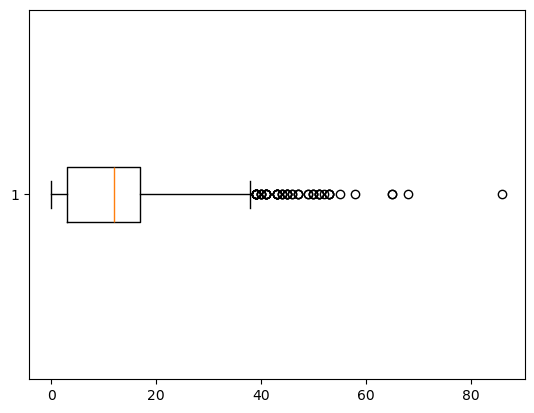

In [100]:
import matplotlib.pyplot as plt
plt.boxplot(df['Bonus_trans'],vert=False)
plt.show()

In [101]:
import numpy as np
import pandas as pd
q1= np.percentile(df['Bonus_trans'],25)
q2= np.percentile(df['Bonus_trans'],50)
q3= np.percentile(df['Bonus_trans'],75)
iqr=q3-q1
uw= q3+(iqr*1.5)
lw= q1-(iqr*1.5)
print(len(df[df['Bonus_trans']>uw]))
df.loc[df['Bonus_trans']>uw,'Bonus_trans']=uw

63


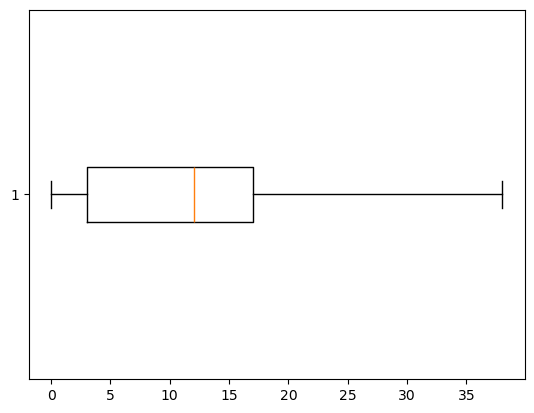

In [102]:
import matplotlib.pyplot as plt
plt.boxplot(df['Bonus_trans'],vert=False)
plt.show()

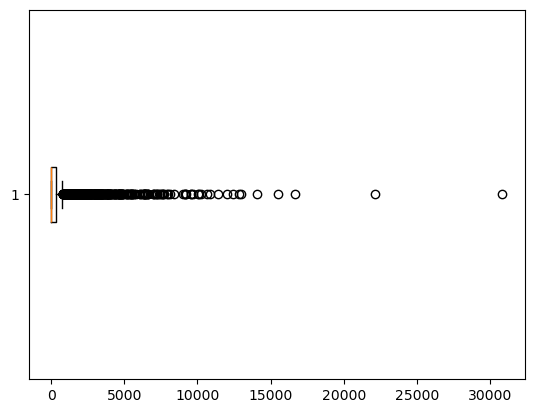

In [103]:
import matplotlib.pyplot as plt
plt.boxplot(df['Flight_miles_12mo'],vert=False)
plt.show()

In [104]:
import numpy as np
import pandas as pd
q1= np.percentile(df['Flight_miles_12mo'],25)
q2= np.percentile(df['Flight_miles_12mo'],50)
q3= np.percentile(df['Flight_miles_12mo'],75)
iqr=q3-q1
uw= q3+(iqr*1.5)
lw= q1-(iqr*1.5)
print(len(df[df['Flight_miles_12mo']>uw]))
df.loc[df['Flight_miles_12mo']>uw,'Flight_miles_12mo']=uw

569


C:\Users\andeb\AppData\Local\Temp\ipykernel_8992\1891788041.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '777.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Flight_miles_12mo']>uw,'Flight_miles_12mo']=uw


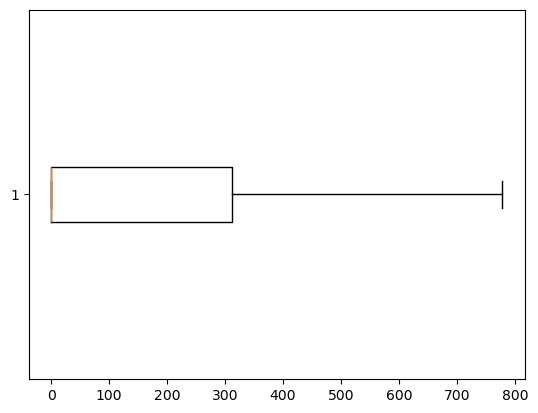

In [105]:
import matplotlib.pyplot as plt
plt.boxplot(df['Flight_miles_12mo'],vert=False)
plt.show()

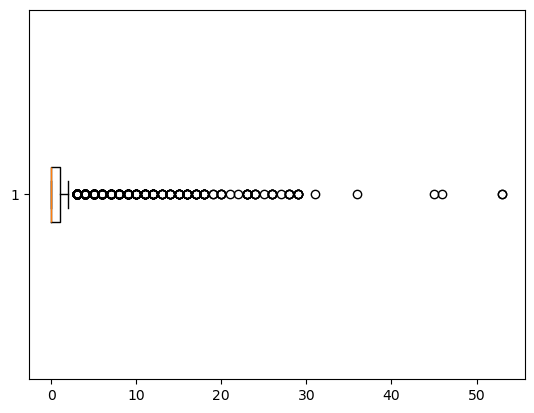

In [106]:
import matplotlib.pyplot as plt
plt.boxplot(df['Flight_trans_12'],vert=False)
plt.show()

In [107]:
import numpy as np
import pandas as pd
q1= np.percentile(df['Flight_trans_12'],25)
q2= np.percentile(df['Flight_trans_12'],50)
q3= np.percentile(df['Flight_trans_12'],75)
iqr=q3-q1
uw= q3+(iqr*1.5)
lw= q1-(iqr*1.5)
print(len(df[df['Flight_trans_12']>uw]))
df.loc[df['Flight_trans_12']>uw,'Flight_trans_12']=uw

565


C:\Users\andeb\AppData\Local\Temp\ipykernel_8992\2174390590.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Flight_trans_12']>uw,'Flight_trans_12']=uw


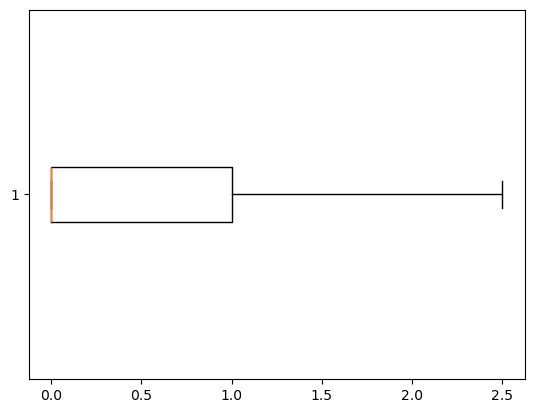

In [108]:
import matplotlib.pyplot as plt
plt.boxplot(df['Flight_trans_12'],vert=False)
plt.show()

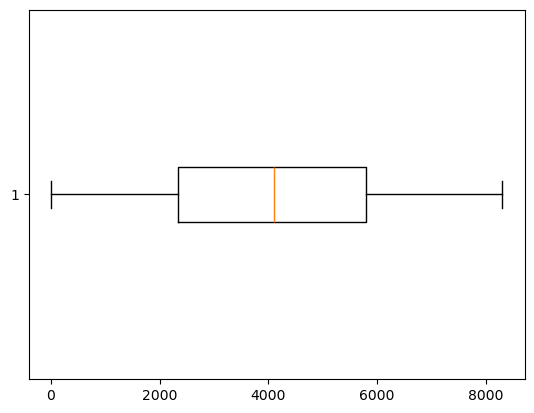

In [109]:
import matplotlib.pyplot as plt
plt.boxplot(df['Days_since_enroll'],vert=False)
plt.show()

In [110]:
# The outliers in the data set are removed using boxplot.

In [111]:
# scaling the features
df_count=df[df.columns[[1,2,6,7,8,9,10]]]
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss_count= ss.fit_transform(df_count)
ss_count= pd.DataFrame(ss_count)
ss_count.columns= df_count.columns
ss_count

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.607258,0.0,-0.843091,-1.148854,-0.604313,-0.626143,1.395454
1,-0.758947,0.0,-0.840822,-1.039133,-0.604313,-0.626143,1.379957
2,-0.382070,0.0,-0.624581,-0.819689,-0.604313,-0.626143,1.411920
3,-0.835106,0.0,-0.825052,-1.148854,-0.604313,-0.626143,1.372208
4,0.579265,0.0,1.543191,1.594189,2.034489,2.020176,1.363975
...,...,...,...,...,...,...,...
3994,-0.772038,0.0,-0.381007,-0.819689,0.074478,0.432384,-1.315120
3995,0.010506,0.0,-0.798437,-0.709967,-0.604313,-0.626143,-1.318994
3996,0.167530,0.0,0.555335,-0.380802,-0.604313,-0.626143,-1.315604
3997,-0.151188,0.0,-0.825052,-1.148854,1.092666,0.432384,-1.316088


In [112]:
df_cat=df[df.columns[[3,4,5,11]]]
df_new= pd.concat((ss_count,df_cat),axis=1)
df_new

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cc1_miles,cc2_miles,cc3_miles,Award?
0,-0.607258,0.0,-0.843091,-1.148854,-0.604313,-0.626143,1.395454,1,1,1,0
1,-0.758947,0.0,-0.840822,-1.039133,-0.604313,-0.626143,1.379957,1,1,1,0
2,-0.382070,0.0,-0.624581,-0.819689,-0.604313,-0.626143,1.411920,1,1,1,0
3,-0.835106,0.0,-0.825052,-1.148854,-0.604313,-0.626143,1.372208,1,1,1,0
4,0.579265,0.0,1.543191,1.594189,2.034489,2.020176,1.363975,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.772038,0.0,-0.381007,-0.819689,0.074478,0.432384,-1.315120,1,1,1,1
3995,0.010506,0.0,-0.798437,-0.709967,-0.604313,-0.626143,-1.318994,1,1,1,1
3996,0.167530,0.0,0.555335,-0.380802,-0.604313,-0.626143,-1.315604,3,1,1,1
3997,-0.151188,0.0,-0.825052,-1.148854,1.092666,0.432384,-1.316088,1,1,1,0


<Axes: ylabel='Frequency'>

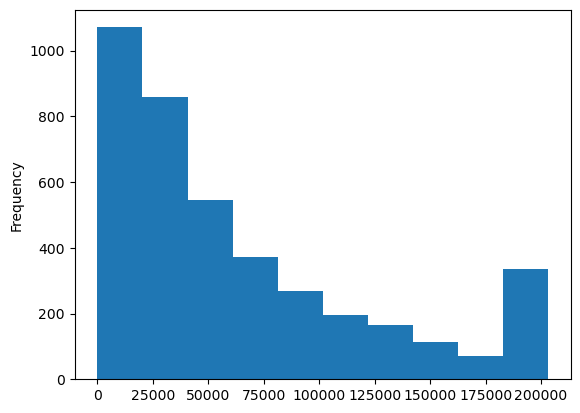

In [113]:
# 2.Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
df['Balance'].plot(kind='hist') # Balance is having positive distribution.

<Axes: ylabel='Frequency'>

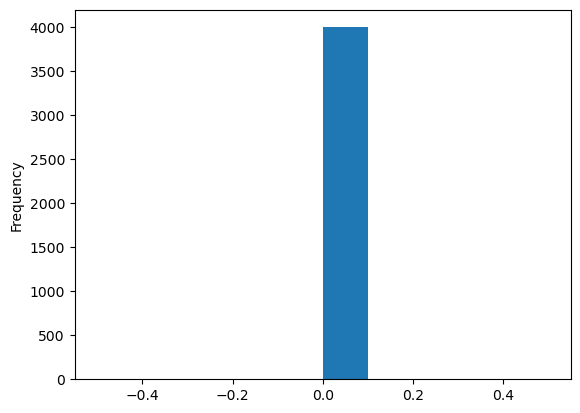

In [114]:
df['Qual_miles'].plot(kind='hist')

<Axes: ylabel='Frequency'>

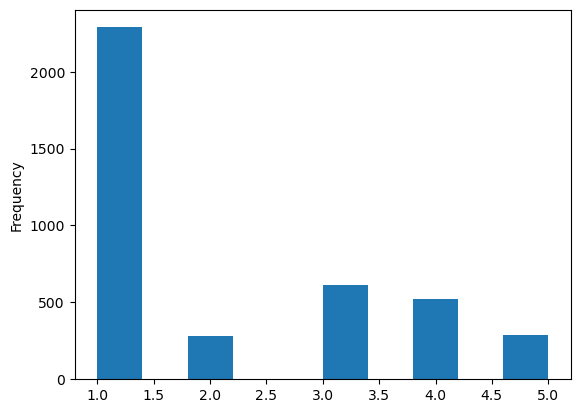

In [115]:
df['cc1_miles'].plot(kind='hist')

<Axes: ylabel='Frequency'>

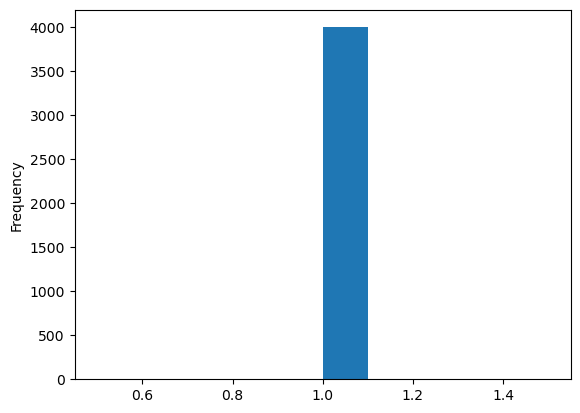

In [116]:
df['cc2_miles'].plot(kind='hist')

<Axes: ylabel='Frequency'>

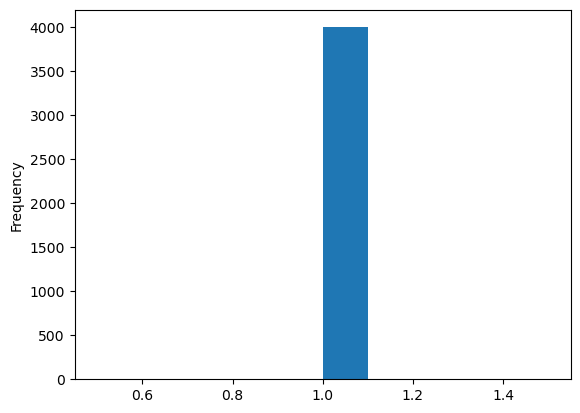

In [117]:
df['cc3_miles'].plot(kind='hist')

<Axes: ylabel='Frequency'>

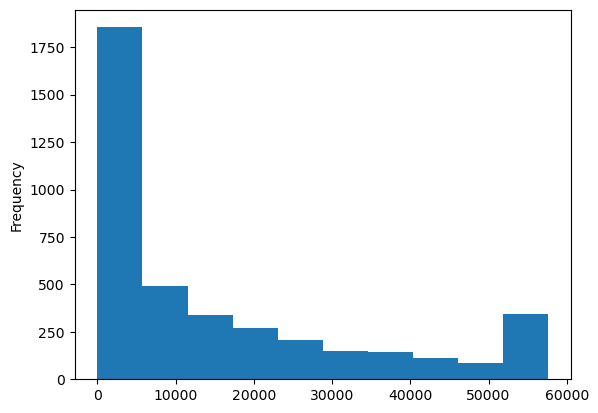

In [118]:
df['Bonus_miles'].plot(kind='hist') # Bonus_miles is having positive distribution.

<Axes: ylabel='Frequency'>

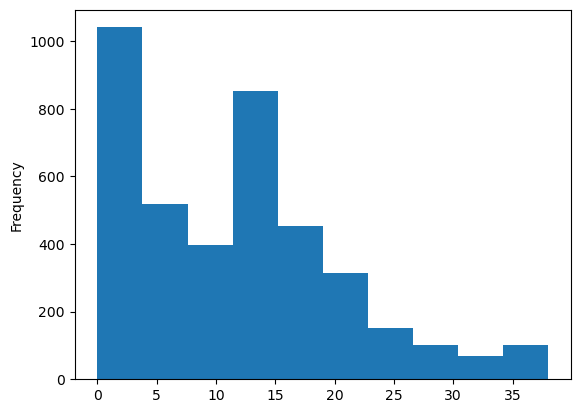

In [119]:
df['Bonus_trans'].plot(kind='hist') # Bonus_trans is having positive distribution.

<Axes: ylabel='Frequency'>

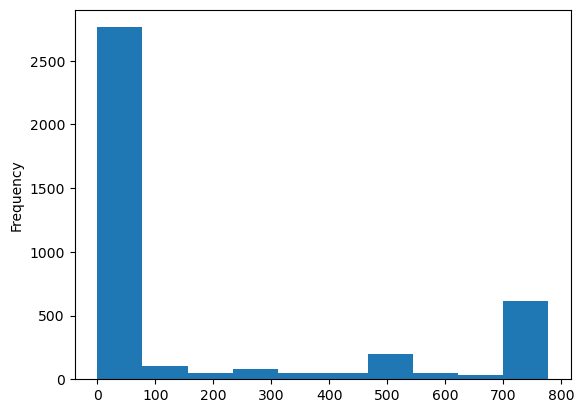

In [120]:
df['Flight_miles_12mo'].plot(kind='hist') # 'Flight_miles_12mo is having positive distribution.

<Axes: ylabel='Frequency'>

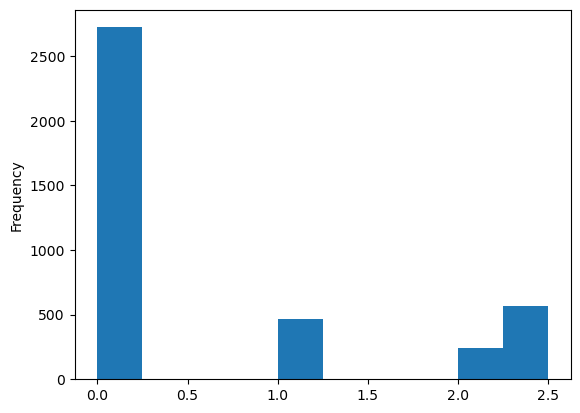

In [121]:
df['Flight_trans_12'].plot(kind='hist')

<Axes: ylabel='Frequency'>

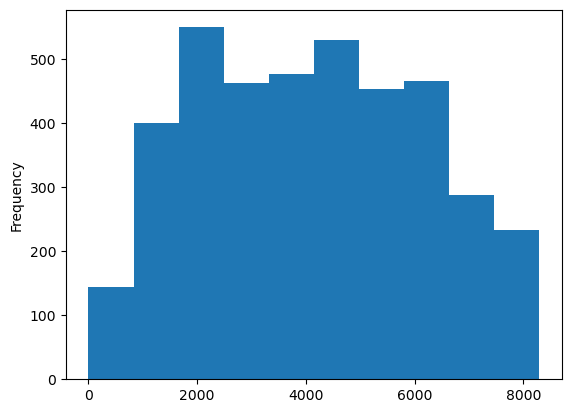

In [122]:
df['Days_since_enroll'].plot(kind='hist') # Days_since_enroll is having positive distribution.

In [123]:
# identify potential clusters.
from sklearn.decomposition import PCA
pca= PCA()
pca.fit(df_new)

PCA()

In [124]:
explained_var=pca.explained_variance_ratio_

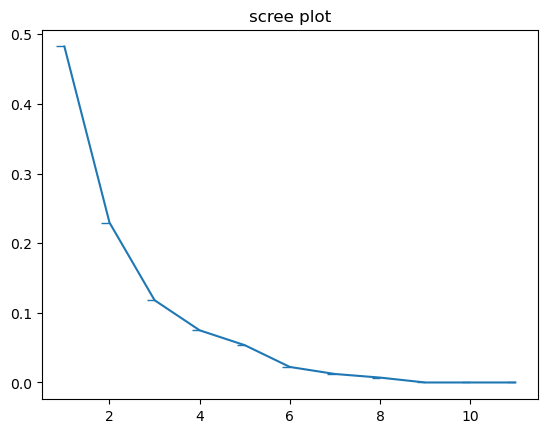

In [125]:
# scree plot
import matplotlib.pyplot as plt
plt.plot(range(1,len(explained_var)+1),explained_var,marker=0)
plt.title('scree plot')
plt.show()

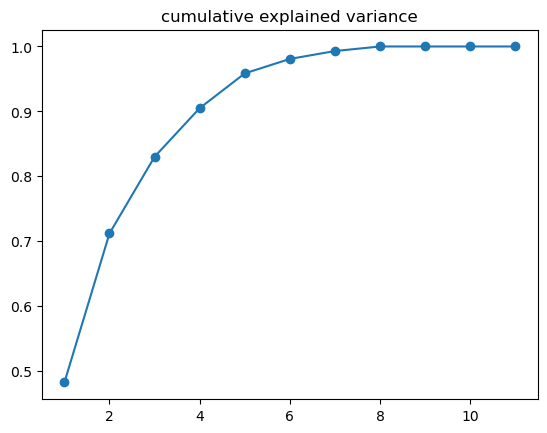

In [126]:
#cumulative explained variance
cumulative_var=np.cumsum(explained_var)
plt.plot(range(1,len(cumulative_var)+1),cumulative_var,marker='o')
plt.title('cumulative explained variance')
plt.show()

In [127]:
print(pd.DataFrame({
    'PC':range(1,len(explained_var)+1),
    "explained_variance":explained_var,
    "Cumulative_variance":cumulative_var
}))

    PC  explained_variance  Cumulative_variance
0    1        4.823816e-01             0.482382
1    2        2.296019e-01             0.711984
2    3        1.181022e-01             0.830086
3    4        7.488174e-02             0.904967
4    5        5.356308e-02             0.958531
5    6        2.227390e-02             0.980804
6    7        1.218615e-02             0.992991
7    8        7.009399e-03             1.000000
8    9        8.292877e-35             1.000000
9   10        0.000000e+00             1.000000
10  11        0.000000e+00             1.000000


In [128]:
# By using cumulative explained variance , we can consider pc 1,2,3.
# By using sree plot we can consider pc 1,2,3.

In [129]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(df_new)

PCA(n_components=3)

In [130]:
X_pca=pca.transform(df_new)
pca_df= pd.DataFrame(X_pca,columns=[f"pc{i+1}"for i in range(3)])
pca_df

,pc1,pc2,pc3
0,-1.764231,-0.337842,1.655164
1,-1.772166,-0.350267,1.578188
2,-1.455764,-0.355165,1.654110
3,-1.834758,-0.360066,1.564824
4,3.918135,1.701624,0.338056
...,...,...,...
3994,-1.468078,0.749346,-1.116197
3995,-1.732853,-0.227752,-0.722125
3996,0.320331,-1.183719,-1.215779
3997,-1.487260,1.482499,-0.901080


In [131]:
# pc 1,2,3 are potential clusters

In [132]:
# 3.Use multiple visualizations to understand the hidden patterns in the dataset

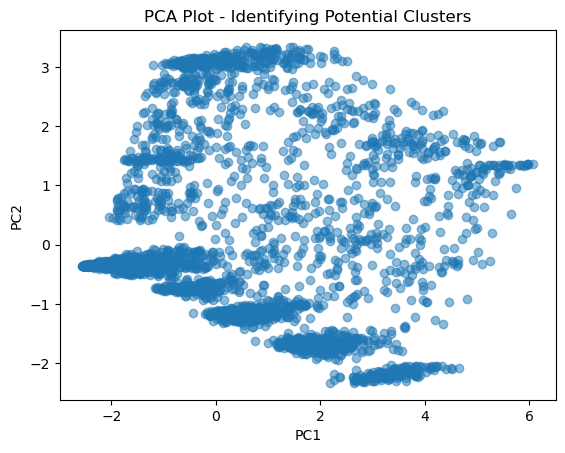

In [133]:
plt.scatter(pca_df.iloc[:,0],pca_df.iloc[:,1],alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Plot - Identifying Potential Clusters")
plt.show()

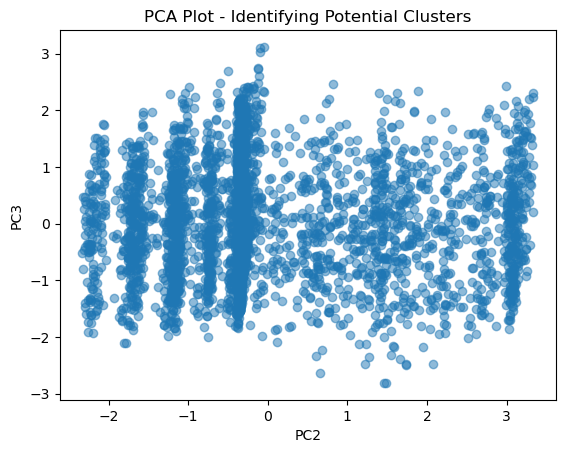

In [134]:
plt.scatter(pca_df.iloc[:,1],pca_df.iloc[:,2],alpha=0.5)
plt.xlabel("PC2")
plt.ylabel("PC3")
plt.title("PCA Plot - Identifying Potential Clusters")
plt.show()

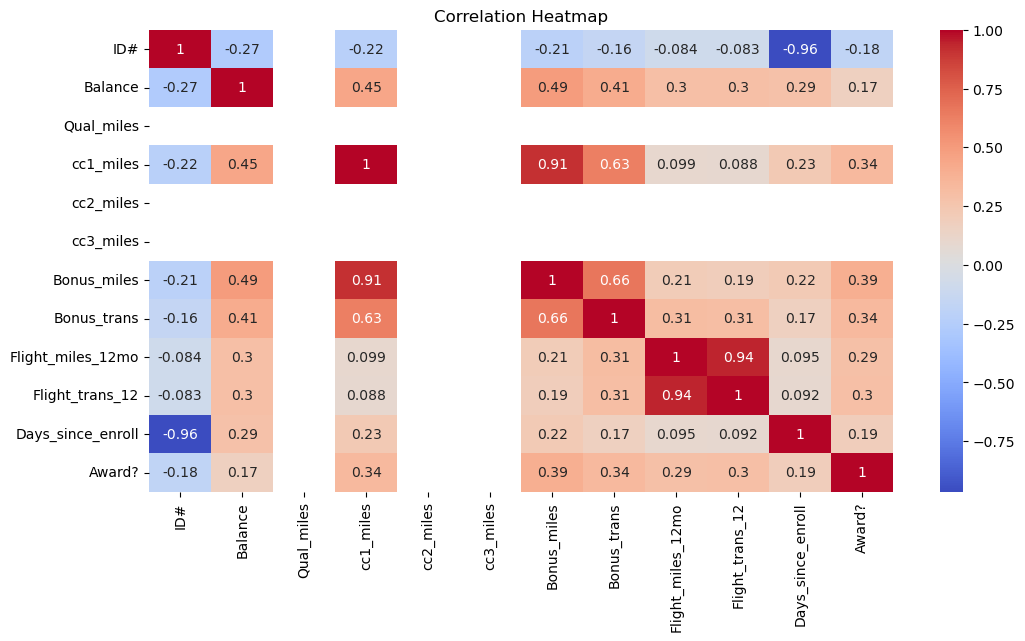

In [135]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()

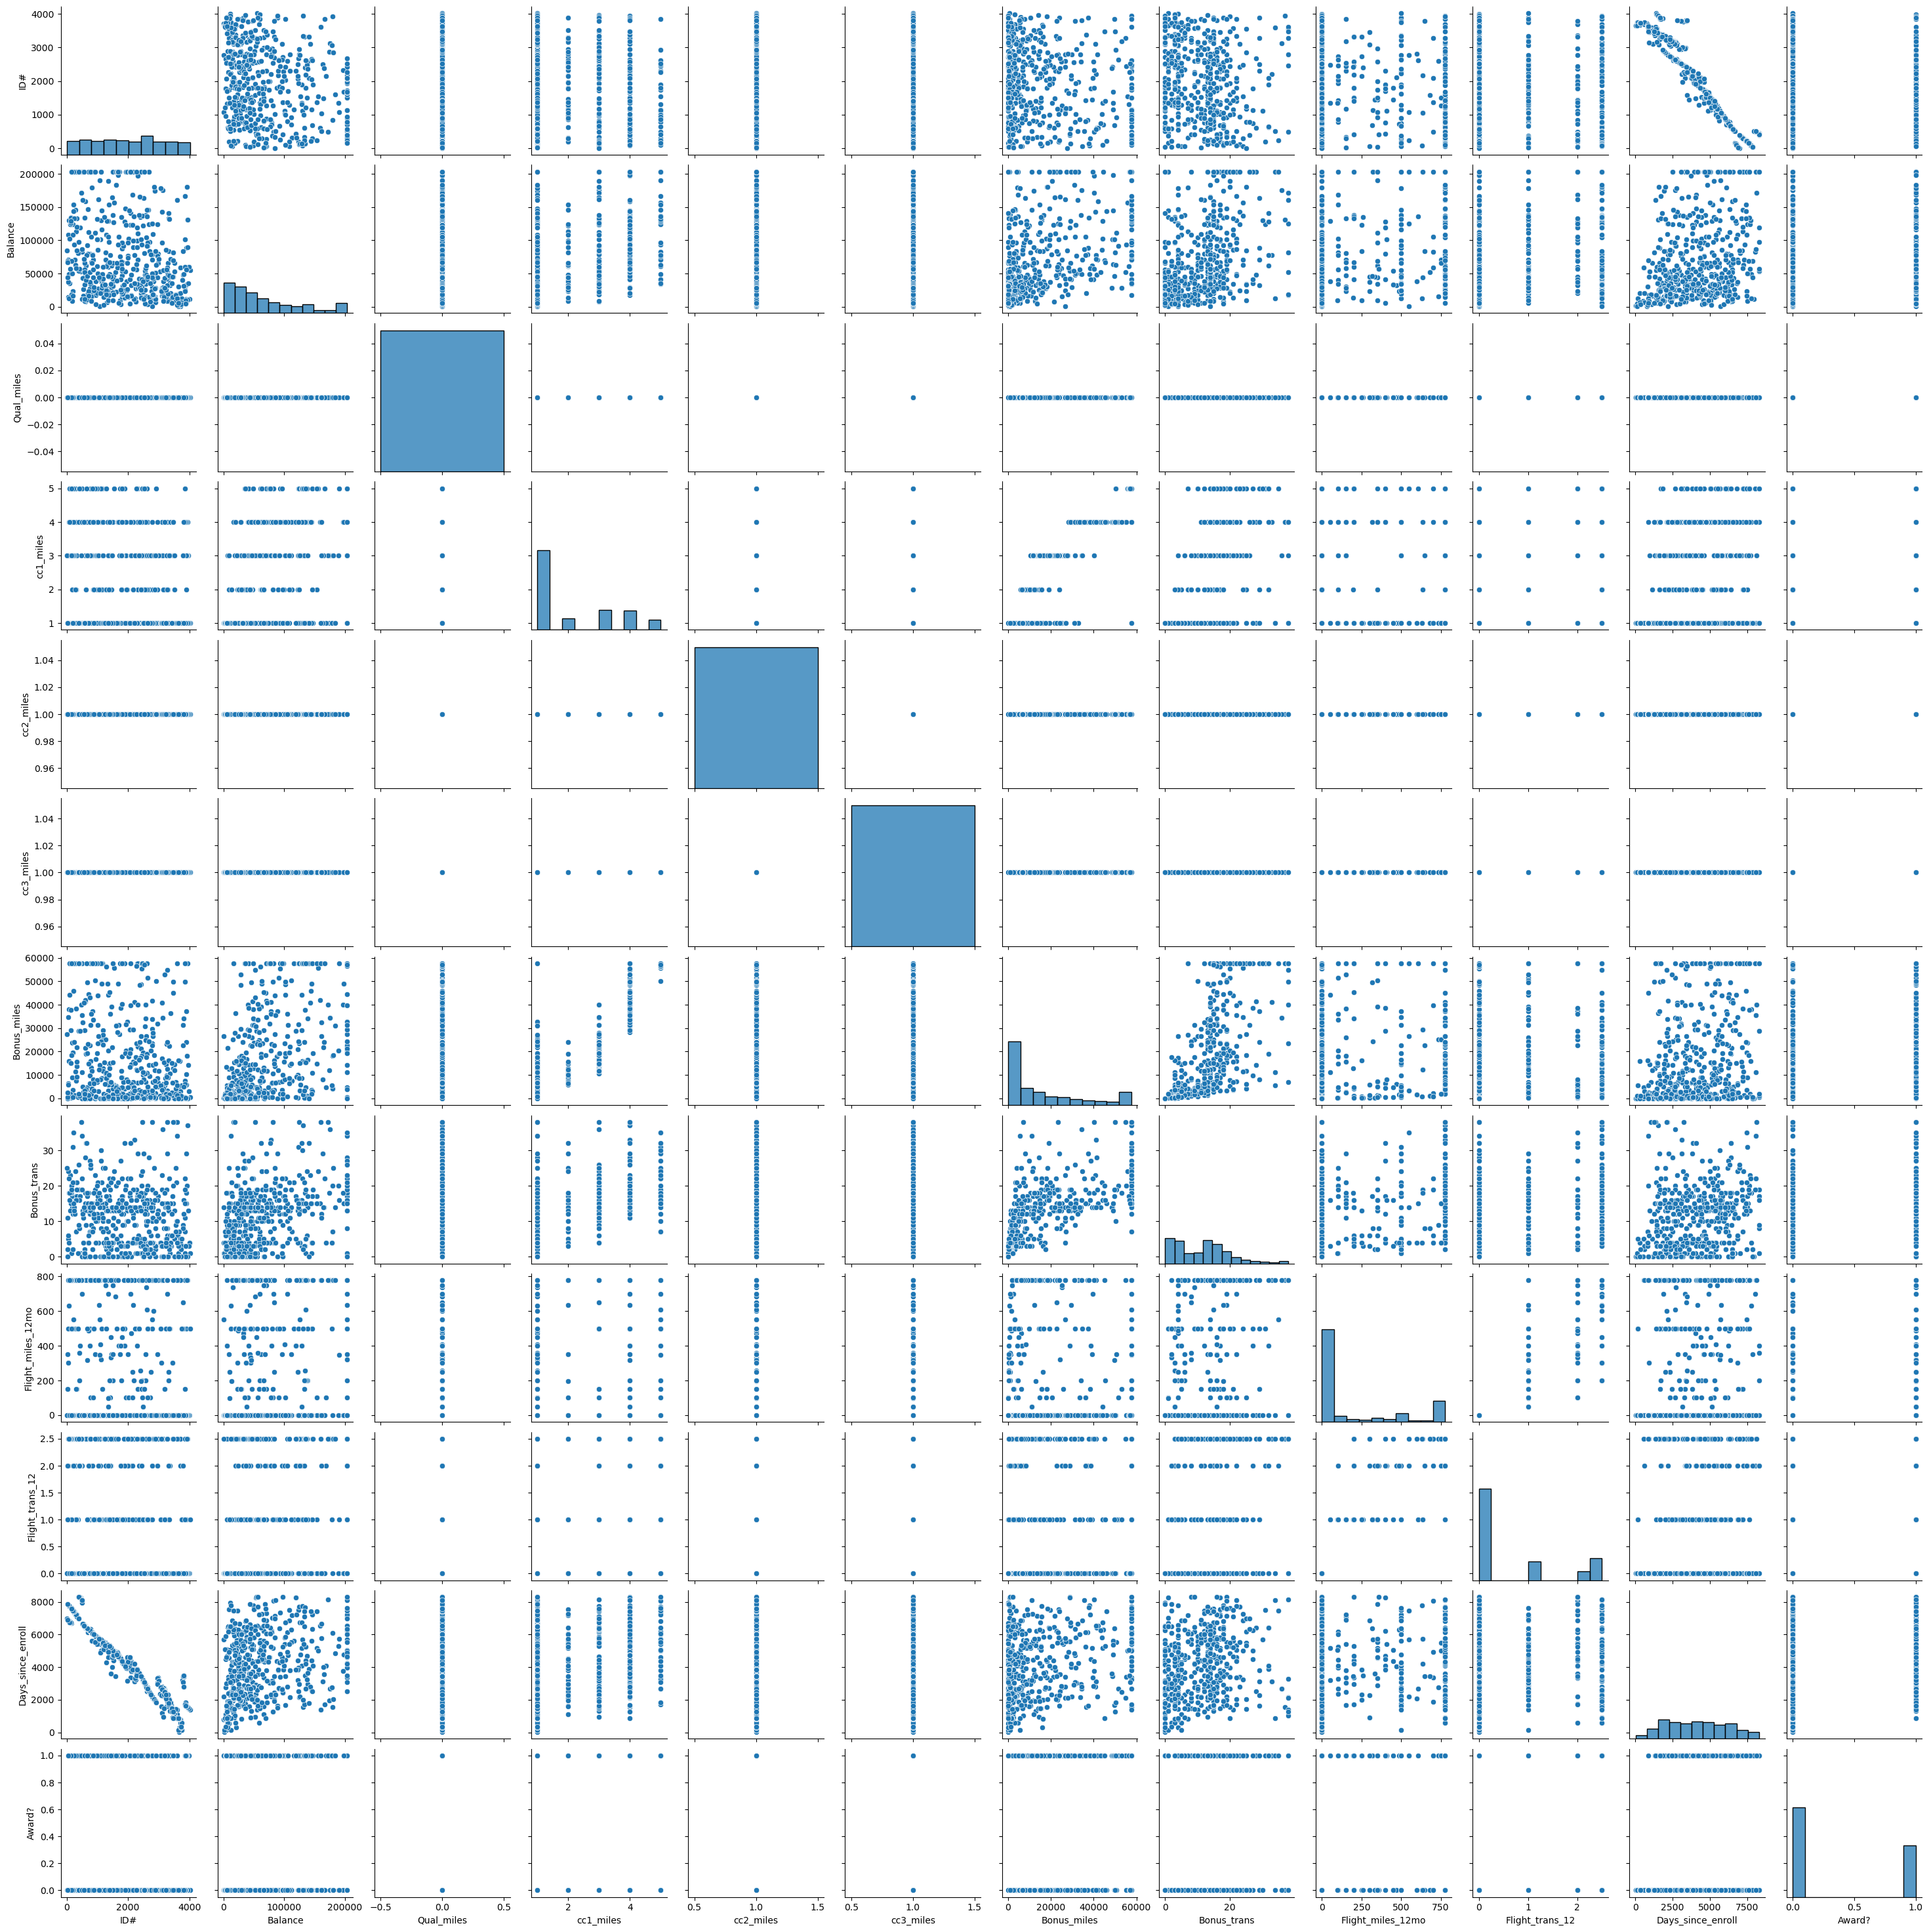

In [136]:
import seaborn as sns
sns.pairplot(df.sample(500))
plt.show()

In [137]:
# Implementing Clustering Algorithms:
# •	Implement the K-Means and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn.
# •	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
# •	Experiment with different parameter settings for K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) 
# and evaluate the clustering results.

In [138]:
# Implementing Clustering Algorithms:
# •	Implement the K-Means and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn.
# •	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
# K-means algorithm
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5,random_state=42)
df['k5'] = model.fit_predict(df_new)
df['k5']

0       1
1       1
2       1
3       1
4       2
       ..
3994    1
3995    1
3996    4
3997    1
3998    1
Name: k5, Length: 3999, dtype: int32

In [139]:
# As the number of clusters increases the inertia value decreases but at some point there is decrease in the value of inertia slowed down and
# that point is known as elbow point.Here the optimal number of clusters using elbow method is 5 means k=5.

In [140]:
# DBSCAN
from sklearn.cluster import DBSCAN
dbscan= DBSCAN(eps=1,min_samples=2)
df['db_cluster'] = dbscan.fit_predict(df_new)
df['db_cluster'] 

0        0
1        0
2        0
3        0
4        1
        ..
3994     3
3995     8
3996     9
3997    12
3998     0
Name: db_cluster, Length: 3999, dtype: int64

In [141]:
# •	Experiment with different parameter settings for K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) 
# and evaluate the clustering results.

In [142]:
# For K-Means cluster  Elbow curve for different K values
import matplotlib.pyplot as plt
inertia=[]
k_values=range(1,11)

for k in k_values:
    model=KMeans(n_clusters=k,random_state=42)
    model.fit(df_new)
    inertia.append(model.inertia_)

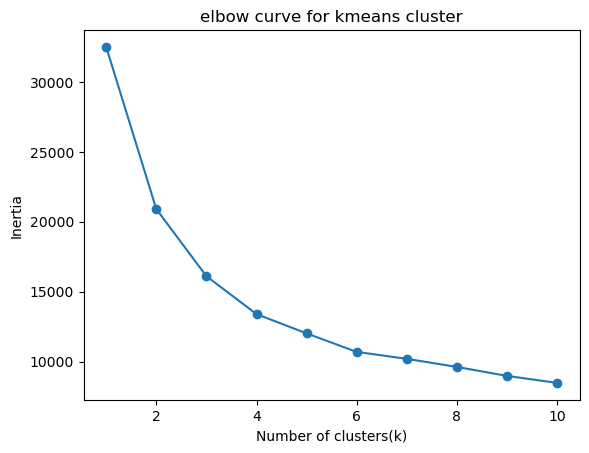

In [143]:
# plot the elbow curve
plt.plot(k_values,inertia,marker='o')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Inertia')
plt.title('elbow curve for kmeans cluster')
plt.show()

In [144]:
#evaluate the clustering results.
from sklearn.cluster import KMeans
model=KMeans(n_clusters=5,random_state=42)
labels = model.fit_predict(df_new)
from sklearn.metrics import silhouette_score
score= silhouette_score(df_new,labels)
print(f"silhouette score for k means cluster is {np.round(score,2)}")

silhouette score for k means cluster is 0.3


In [145]:
# For DBSCAN (e.g., epsilon, minPts)
# K_distance plot for finding best epsilon value
from sklearn.neighbors import NearestNeighbors
k=4 # minpts=4
nbrs= NearestNeighbors(n_neighbors=k).fit(df_new)
distances,indices= nbrs.kneighbors(df_new)
distances= np.sort(distances[:,k-1])

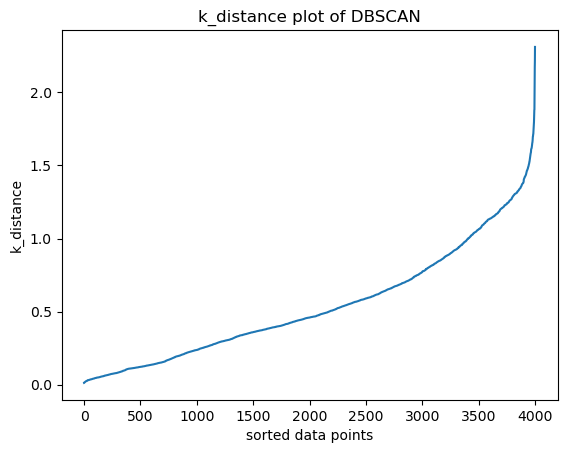

In [146]:
# plotting the k_distance 
plt.plot(distances)
plt.xlabel('sorted data points')
plt.ylabel('k_distance')
plt.title('k_distance plot of DBSCAN')
plt.show()

In [147]:
# Here  the elbow point is approximately 0.5 which is our best epsilon value.

In [148]:
#evaluate the clustering results.
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.5,min_samples=4)
labels = model.fit_predict(df_new)
# counting clusters excluding noise
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:",n_clusters)

Number of clusters: 65


In [149]:
# silhouette score
if n_clusters>1:
    sil_dbscan =silhouette_score(df_new[labels != -1],labels[labels != -1])
    print("silhouette score for DBSCAN is ",np.round(sil_dbscan,2))

silhouette score for DBSCAN is  0.04


In [150]:
# Cluster Analysis and Interpretation:
# Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

# K-Means cluster:
# Since k=5, the algorithm divides the wine dataset into five distinct clusters.
# Some clusters represent wines with higher alcohol content and flavonoid levels, typically associated with richer wine profiles.
# Other clusters group wines with higher acidity and lower color intensity, indicating lighter wines.
# The silhouette score suggests a reasonable separation between clusters.

# DBSCAN clustering :
# DBSCAN forms clusters based on data density, resulting in fewer clusters compared to K-Means.
# A number of wine samples are labeled as noise (outliers).
# DBSCAN is effective for outlier detection but less effective for identifying all wine groups due to varying data densities.

# insights:
# K-Means is better suited for capturing overall wine groupings and produces interpretable clusters.
# DBSCAN is useful for detecting abnormal wines rather than full segmentation.
# Combining both methods provides a better understanding of wine similarities and abnormalities.

In [ ]:
# Visualization:
# Visualize the clustering results using scatter plots or other suitable visualization techniques.
# Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.

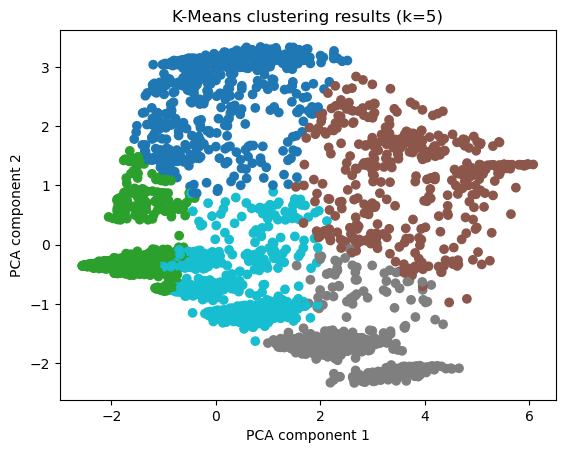

In [151]:
# Visualization:
# Visualize the clustering results using scatter plots or other suitable visualization techniques.
# This is regarding K_Means clustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
x_pca = pca.fit_transform(df_new)
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['k5'],cmap='tab10')
plt.title("K-Means clustering results (k=5)")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.show()

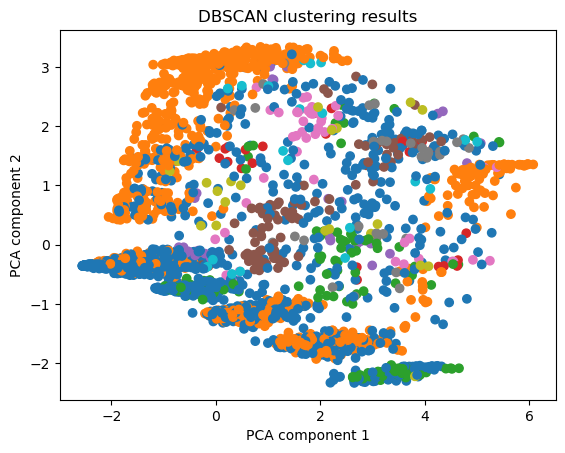

In [152]:
# Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.
# This is regarding DBSCAN clustering
plt.scatter(X_pca[:,0],X_pca[:,1],c=df['db_cluster'],cmap='tab10')
plt.title("DBSCAN clustering results")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.show()

In [153]:
# Evaluation and Performance Metrics:
# Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.
#evaluate the clustering results.
from sklearn.cluster import KMeans
model=KMeans(n_clusters=5,random_state=42)
labels = model.fit_predict(df_new)
from sklearn.metrics import silhouette_score
score= silhouette_score(df_new,labels)
print(f"silhouette score for k means cluster is {np.round(score,2)}")

silhouette score for k means cluster is 0.3


In [154]:
#evaluate the clustering results.
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.5,min_samples=4)
labels = model.fit_predict(df_new)
# counting clusters excluding noise
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:",n_clusters)

Number of clusters: 65
